In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

1) here i imported libraries that will be used in this assignment.

In [2]:
data = pd.read_csv("breastcancerdownload.csv")
data.shape

(569, 32)

2) loading the dataset and checked it's rows and columns.

In [3]:
X , y = data.iloc[:,2:32], data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 28)

3) here i seprated the dataset into it's features and labels into X and y respectively. then just performing the train_test_split on X and y.

In [4]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

4) here just encoding the orignal labels that were ['B','M'] into [0,1]

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


5) using standardization on X_train and X_test.

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

6) builing a logistic regression model.

In [7]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train_scaled,y_train_encoded)
y_pred = clf.predict(X_test_scaled)
acc = np.sum(y_pred==y_test_encoded)/len(y_test_encoded)
print(acc*100,"%")

94.2982456140351 %


7) appling that logistic regression on scaled data and checking the accuracy.

In [8]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       147
           1       0.89      0.96      0.92        81

    accuracy                           0.94       228
   macro avg       0.93      0.95      0.94       228
weighted avg       0.95      0.94      0.94       228



8) here is the classification report of scaled data.

<Axes: >

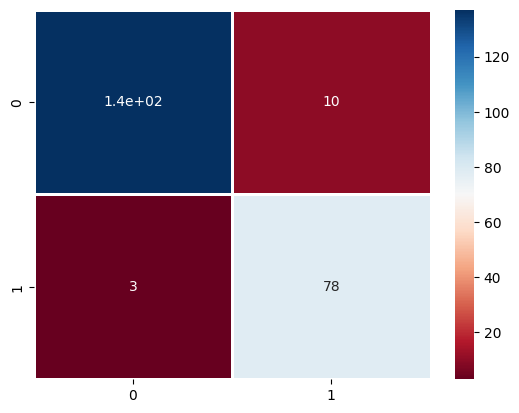

In [9]:
preprocessed_data = confusion_matrix (y_test_encoded, y_pred)
sns.heatmap(preprocessed_data,annot=True, cmap='RdBu', linewidths=.9)

9) simply using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on scaled data.

In [10]:
clf2 = LogisticRegression(lr=0.01)
clf2.fit(X_train,y_train_encoded)
y_pred2= clf.predict(X_test)
acc2= np.sum(y_pred2==y_test_encoded)/len(y_test_encoded)
print(acc2*100,"%")

35.526315789473685 %


10) now applying the logistic regression on orignal unscaled data and seeing it's accuracy.

In [11]:
print(classification_report(y_test_encoded,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.36      1.00      0.52        81

    accuracy                           0.36       228
   macro avg       0.18      0.50      0.26       228
weighted avg       0.13      0.36      0.19       228



11) getting the classfication report on unscaled data.

<Axes: >

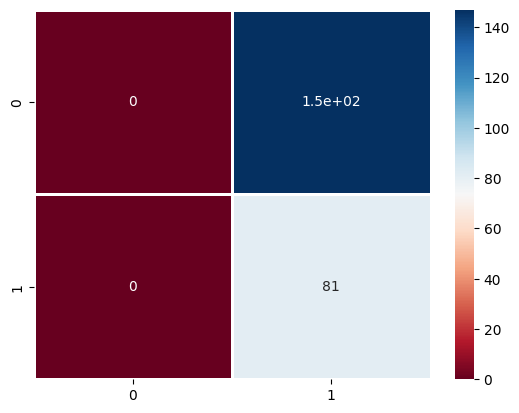

In [12]:
normal_data = confusion_matrix (y_test_encoded, y_pred2)
sns.heatmap(normal_data,annot=True, cmap='RdBu', linewidths=.9)

12) using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on unscaled data.

In [13]:
print("accuracy on scaled data = ",acc*100,"%")
print("accuracy on unscaled/orignal data = ",acc2*100,"%")

accuracy on scaled data =  94.2982456140351 %
accuracy on unscaled/orignal data =  35.526315789473685 %


13) here you can see that the accuracy of the logistic regression model is very high "94%" on the preprocessed scaled data. on the other hand the accuracy of unscaled data is very low "36%". the difference in accuracy is about "58%"